# Water Quality
The database was taken from kaggle for more references visit: https://www.kaggle.com/datasets/mssmartypants/water-quality?resource=download
<br>In this project the objective is to predict if the water is safe or not, so the answer will be:
- 0 = not safe
- 1 = safe 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.gridspec as gridspec
from collections import Counter
import numpy as np 
from sklearn.model_selection import train_test_split
from matplotlib.colors import LogNorm
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import models
from tensorflow.keras import layers

## Auxiliary functions

In [2]:
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = df[stratify] if stratify else None
    val_set, test_set = train_test_split(test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [3]:
def remove_labels(df, label_name):
    x = df.drop(label_name, axis=1)
    y = df[label_name].copy()
    return (x,y)

## Loading and cleaning the database

In [4]:
df = pd.read_csv("datasets/waterQuality1.csv")

In [5]:
df.isna().any()

aluminium      False
ammonia        False
arsenic        False
barium         False
cadmium        False
chloramine     False
chromium       False
copper         False
flouride       False
bacteria       False
viruses        False
lead           False
nitrates       False
nitrites       False
mercury        False
perchlorate    False
radium         False
selenium       False
silver         False
uranium        False
is_safe        False
dtype: bool

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [7]:
df.query("is_safe != 0 and is_safe != 1")

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [8]:
df.head(10)

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
5,0.94,14.47,0.03,2.88,0.003,0.80,0.43,1.38,0.11,0.67,...,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1
6,2.36,5.6,0.01,1.35,0.004,1.28,0.62,1.88,0.33,0.13,...,0.021,18.60,1.78,0.007,45.34,2.84,0.10,0.24,0.08,0
7,3.93,19.87,0.04,0.66,0.001,6.22,0.10,1.86,0.86,0.16,...,0.197,13.65,1.81,0.001,53.35,7.24,0.08,0.08,0.07,0
8,0.60,24.58,0.01,0.71,0.005,3.14,0.77,1.45,0.98,0.35,...,0.167,14.66,1.84,0.004,23.43,4.99,0.08,0.25,0.08,1
9,0.22,16.76,0.02,1.37,0.007,6.40,0.49,0.82,1.24,0.83,...,0.109,4.79,1.46,0.010,30.42,0.08,0.03,0.31,0.01,1


In [9]:
df_copy = df.copy()

In [10]:
df_columna = df['is_safe'].apply(lambda x: isinstance(x, str))
datos_string = df[df_columna]
print(datos_string)

      aluminium ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.65    9.08     0.04    2.85    0.007        0.35      0.83   
1          2.32   21.16     0.01    3.31    0.002        5.28      0.68   
2          1.01   14.02     0.04    0.58    0.008        4.24      0.53   
3          1.36   11.33     0.04    2.96    0.001        7.23      0.03   
4          0.92   24.33     0.03    0.20    0.006        2.67      0.69   
...         ...     ...      ...     ...      ...         ...       ...   
7994       0.05    7.78     0.00    1.95    0.040        0.10      0.03   
7995       0.05   24.22     0.02    0.59    0.010        0.45      0.02   
7996       0.09    6.85     0.00    0.61    0.030        0.05      0.05   
7997       0.01      10     0.01    2.00    0.000        2.00      0.00   
7998       0.04    6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  ...   lead  nitrates  nitrites  mercury  \
0       0.17      0.05

In [11]:
df_copy[df['is_safe'] == '#NUM!']

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
7551,0.03,#NUM!,0.08,0.79,0.07,0.08,0.05,0.58,0.34,0.00,...,0.183,4.37,1.43,0.007,0.62,2.54,0.07,0.05,0.05,#NUM!
7568,0.06,#NUM!,0.07,1.72,0.08,0.32,0.01,1.11,0.61,0.00,...,0.178,12.10,2.03,0.008,1.37,2.05,0.06,0.10,0.07,#NUM!
7890,0.01,#NUM!,0.08,0.49,0.00,0.07,0.09,0.06,0.72,0.57,...,0.088,9.57,1.45,0.009,7.67,7.70,0.03,0.05,0.02,#NUM!


In [12]:
df_copy[df['ammonia'] == '#NUM!']

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
7551,0.03,#NUM!,0.08,0.79,0.07,0.08,0.05,0.58,0.34,0.00,...,0.183,4.37,1.43,0.007,0.62,2.54,0.07,0.05,0.05,#NUM!
7568,0.06,#NUM!,0.07,1.72,0.08,0.32,0.01,1.11,0.61,0.00,...,0.178,12.10,2.03,0.008,1.37,2.05,0.06,0.10,0.07,#NUM!
7890,0.01,#NUM!,0.08,0.49,0.00,0.07,0.09,0.06,0.72,0.57,...,0.088,9.57,1.45,0.009,7.67,7.70,0.03,0.05,0.02,#NUM!


In [13]:
df_copy = df_copy[df_copy['is_safe'] != '#NUM!'].copy()

In [14]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   object 
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uranium    

In [15]:
df_copy.head(10)

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
5,0.94,14.47,0.03,2.88,0.003,0.80,0.43,1.38,0.11,0.67,...,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1
6,2.36,5.6,0.01,1.35,0.004,1.28,0.62,1.88,0.33,0.13,...,0.021,18.60,1.78,0.007,45.34,2.84,0.10,0.24,0.08,0
7,3.93,19.87,0.04,0.66,0.001,6.22,0.10,1.86,0.86,0.16,...,0.197,13.65,1.81,0.001,53.35,7.24,0.08,0.08,0.07,0
8,0.60,24.58,0.01,0.71,0.005,3.14,0.77,1.45,0.98,0.35,...,0.167,14.66,1.84,0.004,23.43,4.99,0.08,0.25,0.08,1
9,0.22,16.76,0.02,1.37,0.007,6.40,0.49,0.82,1.24,0.83,...,0.109,4.79,1.46,0.010,30.42,0.08,0.03,0.31,0.01,1


## We normalize the database

In [16]:
l = MinMaxScaler()
df_norm = pd.DataFrame(l.fit_transform(df_copy), columns=df_copy.columns)

In [17]:
df_norm.max()

aluminium      1.0
ammonia        1.0
arsenic        1.0
barium         1.0
cadmium        1.0
chloramine     1.0
chromium       1.0
copper         1.0
flouride       1.0
bacteria       1.0
viruses        1.0
lead           1.0
nitrates       1.0
nitrites       1.0
mercury        1.0
perchlorate    1.0
radium         1.0
selenium       1.0
silver         1.0
uranium        1.0
is_safe        1.0
dtype: float64

In [18]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7996 entries, 0 to 7995
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

# Separating the database into train, validation, and tes

In [19]:
train_set, val_set, test_set = train_val_test_split(df_norm)

In [20]:
x_train, y_train = remove_labels(train_set, "is_safe")
x_val, y_val = remove_labels(val_set, "is_safe")
x_test, y_test = remove_labels(test_set, "is_safe")

In [21]:
y_train

5502    0.0
3915    0.0
5331    0.0
3404    0.0
4222    0.0
       ... 
5226    0.0
5390    0.0
860     1.0
7603    0.0
7270    0.0
Name: is_safe, Length: 4797, dtype: float64

In [22]:
print((x_train.shape[1],))

(20,)


# Creating a tensorflow Model to predict

In [23]:
model = models.Sequential()
model.add(layers.Input((x_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,849 (26.75 KB)

 Trainable params: 6,849 (26.75 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
history = model.fit(x_train, y_train, epochs=200, batch_size=10, validation_data=(x_val, y_val))

Epoch 1/200


480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8880 - loss: 0.3185 - val_accuracy: 0.8837 - val_loss: 0.2803
Epoch 2/200
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - accuracy: 0.9105 - loss: 0.2357 - val_accuracy: 0.8924 - val_loss: 0.2606
Epoch 3/200
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - accuracy: 0.9242 - loss: 0.1983 - val_accuracy: 0.9018 - val_loss: 0.2387
Epoch 4/200
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - accuracy: 0.9280 - loss: 0.1767 - val_accuracy: 0.9243 - val_loss: 0.1959
Epoch 5/200
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - accuracy: 0.9325 - loss: 0.1607 - val_accuracy: 0.9281 - val_loss: 0.1763
Epoch 6/200
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - accuracy: 0.9399 - loss: 0.1475 - val_accuracy: 0.9406 - val_loss: 0.1671
Epoch 7/200
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - accuracy: 0.9442 - loss: 0.1370 - val_accuracy: 0.9387 - val_loss: 0.1620
Epoch 8/200
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.9469 - loss: 0.1258 - val_ac

# Result 1

In [26]:
pred = model.predict(x_test)
y_pred = np.rint(pred)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step


In [27]:
result = confusion_matrix(y_test, y_pred)
print(result)

[[1341   76]
 [  41  142]]


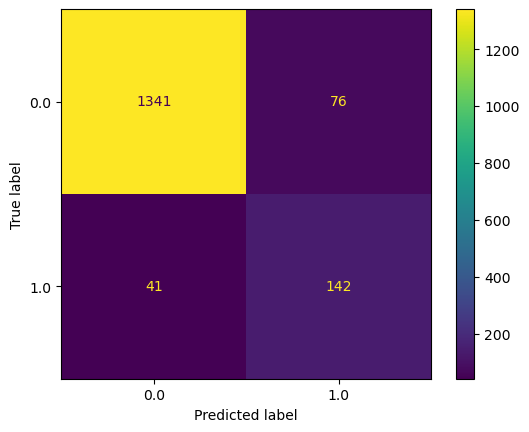

In [28]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [29]:
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.927
F1 Score: 0.7082294264339152


# Using Logistic Regression

In [30]:
clf = LogisticRegression(solver="newton-cg", max_iter=1000)
clf.fit(x_train, y_train)

LogisticRegression(max_iter=1000, solver='newton-cg')

In [31]:
y_pred = clf.predict(x_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

# Result 2

In [33]:
result = confusion_matrix(y_test, y_pred)
print(result)

[[1396   21]
 [ 131   52]]


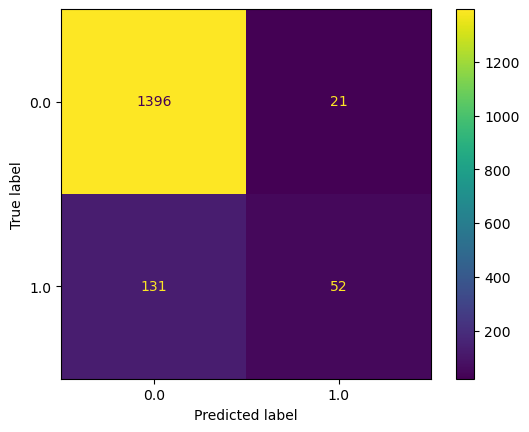

In [34]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [35]:
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.905
F1 Score: 0.40624999999999994


# Using PCA and tensorflow

In [36]:
x_df, y_df = remove_labels(df_norm, 'is_safe')
pca = PCA(n_components=0.95)
df_reduced = pca.fit_transform(x_df)

In [37]:
print("Número de componentes:", pca.n_components_)

Número de componentes: 17


In [38]:
df_reduced = pd.DataFrame(df_reduced, columns=["c1","c2","c3","c4","c5","c6","c7","c8","c9","c10","c11","c12","c13","c14","c15","c16","c17"])
df_reduced["is_safe"] = y_df

In [39]:
train_set, val_set, test_set = train_val_test_split(df_reduced)

In [40]:
x_train, y_train = remove_labels(train_set, 'is_safe')
x_val, y_val = remove_labels(val_set, 'is_safe')
x_test, y_test = remove_labels(test_set, 'is_safe')

In [41]:
model = models.Sequential()
model.add(layers.Input((x_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,465 (25.25 KB)

 Trainable params: 6,465 (25.25 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
history = model.fit(x_train, y_train, epochs=200, batch_size=10, validation_data=(x_val, y_val))

Epoch 1/200
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8960 - loss: 0.3391 - val_accuracy: 0.8937 - val_loss: 0.2615
Epoch 2/200
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - accuracy: 0.9208 - loss: 0.2091 - val_accuracy: 0.9074 - val_loss: 0.2303
Epoch 3/200
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 1000us/step - accuracy: 0.9321 - loss: 0.1791 - val_accuracy: 0.9149 - val_loss: 0.2043
Epoch 4/200
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 978us/step - accuracy: 0.9363 - loss: 0.1702 - val_accuracy: 0.9218 - val_loss: 0.1863
Epoch 5/200
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - accuracy: 0.9435 - loss: 0.1425 - val_accuracy: 0.9174 - val_loss: 0.1880
Epoch 6/200
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - accuracy: 0.9474 - loss: 0.1344 - val_accuracy: 0.9293 - val_loss: 0.1795
Epoch 7/200
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - accuracy: 0.9517 - loss: 0.1208 - val_accuracy: 0.9212 - val_loss: 0.1869
Epoch 8/200
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - accuracy: 0.9499 - loss: 0.

# Result 3

In [44]:
pred = model.predict(x_test)
y_pred = np.rint(pred)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step


In [46]:
result = confusion_matrix(y_test, y_pred)
print(result)

[[1376   41]
 [  69  114]]


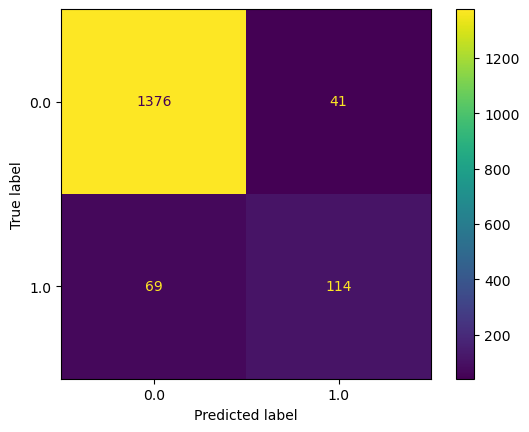

In [47]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [52]:
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.931
F1 Score: 0.6745562130177515
